<h1>Linear Regression 1D: Prediction</h1>

<h2>Preparation</h2>

The following are the libraries we are going to use for this lab.

In [1]:
# These are the libraries will be used for this lab.
import numpy as np
import matplotlib.pyplot as plt
import torch

<!--Empty Space for separating topics-->

<h2 id="Prediction">Prediction</h2>

Let us create the following expressions:

$b=-1,w=2$

$\hat{y}=-1+2x$

First, define the parameters:

In [2]:
# Define w = 2 and b = -1 for y = wx + b

w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

Then, define the function <code>forward(x, w, b)</code> makes the prediction: 

In [3]:
# Function forward(x) for prediction

def forward(x):
    yhat = w * x + b
    return yhat

Let's make the following prediction at <i>x = 1</i>

$\hat{y}=-1+2x$

$\hat{y}=-1+2(1)$

In [4]:
# Predict y = 2x - 1 at x = 1

x = torch.tensor([[1.0]])
yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.]], grad_fn=<AddBackward0>)


<!--Empty Space for separating topics-->

Let us construct the <code>x</code> tensor first. Check the shape of <code>x</code>.

In [5]:
# Create x Tensor and check the shape of x tensor

x = torch.tensor([[1.0], [2.0]])
print("The shape of x: ", x.shape)

The shape of x:  torch.Size([2, 1])


Now make the prediction: 

In [6]:
# Make the prediction of y = 2x - 1 at x = [1, 2]

yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


The result is the same as what it is in the image above.

<!--Empty Space for separating topics-->

<!--Empty Space for separating topics-->

<h2 id="Linear">Class Linear</h2>

The linear class can be used to make a prediction. We can also use the linear class to build more complex models. Let's import the module:

In [7]:
# Import Class Linear

from torch.nn import Linear

Set the random seed because the parameters are randomly initialized:

In [8]:
# Set random seed

torch.manual_seed(1)

<!--Empty Space for separating topics-->

Let us create the linear object by using the constructor. The parameters are randomly created. Let us print out to see what <i>w</i> and <i>b</i>. The parameters of an <code>torch.nn.Module</code> model are contained in the model’s parameters accessed with <code>lr.parameters()</code>:

In [9]:
# Create Linear Regression Model, and print out the parameters

lr = Linear(in_features=1, out_features=1, bias=True)
print("Parameters w and b: ", list(lr.parameters()))


Parameters w and b:  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


This is equivalent to the following expression:  

$b=-0.44, w=0.5153$

$\hat{y}=-0.44+0.5153x$

A method  <code>state_dict()</code> Returns a Python dictionary object corresponding to the layers of each parameter  tensor. 

In [10]:
print("Python dictionary: ",lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())

Python dictionary:  OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[0.5153]]), tensor([-0.4414])])


The keys correspond to the name of the attributes and the values correspond to the parameter value.

In [11]:
print("weight:",lr.weight)
print("bias:",lr.bias)

weight: Parameter containing:
tensor([[0.5153]], requires_grad=True)
bias: Parameter containing:
tensor([-0.4414], requires_grad=True)


Now let us make a single prediction at <i>x = [[1.0]]</i>.

In [12]:
# Make the prediction at x = [[1.0]]

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739]], grad_fn=<AddmmBackward>)


<!--Empty Space for separating topics-->

Use model <code>lr(x)</code> to predict the result.

In [13]:
# Create the prediction using linear model

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


<!--Empty Space for separating topics-->

Make a prediction of the following <code>x</code> tensor using the linear regression model <code>lr</code>.

In [14]:
# Practice: Use the linear regression model object lr to make the prediction.

x = torch.tensor([[1.0],[2.0],[3.0]])

x=torch.tensor([[1.0],[2.0],[3.0]])
yhat = lr(x)
print("The prediction: ", yhat)

<!--Empty Space for separating topics-->

<h2 id="Cust">Build Custom Modules</h2>

Now, let's build a custom module. We can make more complex models by using this method later on. 

First, import the following library.

In [15]:
# Library for this section

from torch import nn

Now, let us define the class: 

In [16]:
# Customize Linear Regression Class

class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        
        # Inherit from parent
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

Create an object by using the constructor. Print out the parameters we get and the model.

In [17]:
# Create the linear regression model. Print out the parameters.

lr = LR(1, 1)
print("The parameters: ", list(lr.parameters()))
print("Linear model: ", lr.linear)

The parameters:  [Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)


<!--Empty Space for separating topics-->

Let us try to make a prediction of a single input sample.

In [18]:
# Try our customize linear regression model with single input

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755]], grad_fn=<AddmmBackward>)


<!--Empty Space for separating topics-->

Now, let us try another example with multiple samples.

In [19]:
# Try our customize linear regression model with multiple input

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755],
        [0.0816]], grad_fn=<AddmmBackward>)


the parameters are also stored in an ordered dictionary :

In [20]:
print("Python dictionary: ", lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())


Python dictionary:  OrderedDict([('linear.weight', tensor([[-0.1939]])), ('linear.bias', tensor([0.4694]))])
keys:  odict_keys(['linear.weight', 'linear.bias'])
values:  odict_values([tensor([[-0.1939]]), tensor([0.4694])])


Now we will train a model with PyTorch by using data that you created. The model only has one parameter: the slope.

The class <code>plot_diagram</code> helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.

In [21]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

<h2 id="Makeup_Data">Make Some Data</h2>

In [22]:

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Generate values from -3 to 3 that create a line with a slope of -3. This is the line you will estimate.

In [23]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

Let us plot the line.

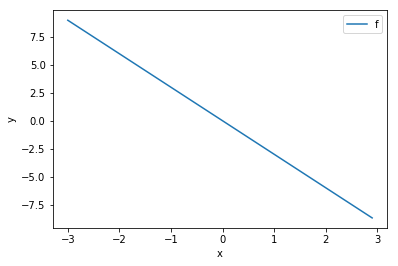

In [24]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let us add some noise to the data in order to simulate the real data. Use <code>torch.randn(X.size())</code> to generate Gaussian noise that is the same size as <code>X</code> and has a standard deviation opf 0.1.

In [25]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

Plot the <code>Y</code>: 

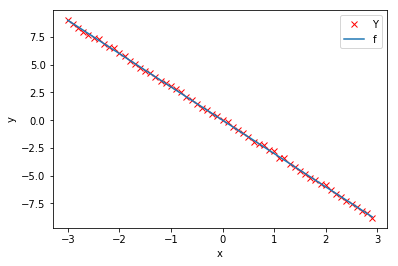

In [26]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()